## Model 2 Fit Results

In [1]:
setwd("/global/project/projectdirs/m1532/Projects_MVP/geospatial/GeoSpatial_Model/spatial-prediction")

In [2]:
library(CARBayesST)
library(tidyverse)

Loading required package: MASS

Loading required package: Rcpp

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()


In [3]:
fit2 <- readRDS("outputs/model_results/fixedtime_model_2022-09-13.rds")

In [4]:
#get fips to keep 

# Note: United States total includes 3,006 counties;
## Loading dataset and geometries ###
vars <- read_csv("data/processed/combined.csv")
# change this to the number of years that 
# you are considering in your dataset.
NUMBER_OF_YEARS <- length(unique(vars$year))


county <- sf::read_sf(
    dsn = "data/shapefile/cb_2020_us_tract_500k",
    layer = "cb_2020_us_tract_500k"
)

county <- county %>%
    mutate(FIPSCODE = paste0(STATEFP, COUNTYFP)) %>% 
    arrange(FIPSCODE) %>%
    distinct(FIPSCODE, .keep_all = TRUE)

df <- county %>% inner_join(vars, on=FIPSCODE)

df_nona <- df %>% na.omit(suicide_rate) %>%
  group_by(FIPSCODE) %>% 
  mutate(name_count = n()) %>%
  ungroup() %>% 
  filter(name_count == NUMBER_OF_YEARS) %>% 
  dplyr::select(-name_count) %>%
  arrange(desc(year), FIPSCODE)

fips_to_keep <- df_nona %>% 
    distinct(FIPSCODE) %>% 
    pull(FIPSCODE)


Rows: 9089 Columns: 103
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): FIPSCODE, county
dbl (101): deaths, ACS_PCT_GRP_QRT, ACS_PCT_PRIVATE_2, mean_temp, ACS_PCT_ME...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“PROJ: proj_identify: Open of /global/homes/b/bbrusco/.conda/envs/r-venv/share/proj failed (GDAL error 1)”
Joining, by = "FIPSCODE"


In [5]:
str(fit2)

List of 10
 $ summary.results    : num [1:93, 1:7] -8.022 1.395 2.511 -0.117 0.522 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:93] "(Intercept)" "ACS_PCT_GRP_QRT" "ACS_PCT_PRIVATE_2" "mean_temp" ...
  .. ..$ : chr [1:7] "Mean" "2.5%" "97.5%" "n.sample" ...
 $ samples            :List of 8
  ..$ beta  : 'mcmc' num [1:70000, 1:88] -7.76 -7.72 -7.79 -7.85 -7.83 ...
  .. ..- attr(*, "mcpar")= num [1:3] 1 70000 1
  ..$ alpha : 'mcmc' num [1:70000, 1] -0.003649 -0.003649 0.001321 0.001321 -0.000285 ...
  .. ..- attr(*, "mcpar")= num [1:3] 1 70000 1
  ..$ phi   : 'mcmc' num [1:70000, 1:3029] 0.0949 0.0911 0.089 -0.2049 -0.1858 ...
  .. ..- attr(*, "mcpar")= num [1:3] 1 70000 1
  ..$ delta : 'mcmc' num [1:70000, 1:3029] 0.327 0.183 0.179 0.615 0.172 ...
  .. ..- attr(*, "mcpar")= num [1:3] 1 70000 1
  ..$ tau2  : 'mcmc' num [1:70000, 1:2] 0.334 0.331 0.327 0.342 0.342 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:2] "tau2.int" "tau2.slo"
  .. 

In [6]:
fit2$summary.results

,Mean,2.5%,97.5%,n.sample,% accept,n.effective,Geweke.diag
(Intercept),-8.0218,-9.2084,-6.9268,70000,42.7,132.0,-1.6
ACS_PCT_GRP_QRT,1.3951,0.6425,2.1414,70000,42.7,182.2,0.0
ACS_PCT_PRIVATE_2,2.5114,0.8958,4.1055,70000,42.7,947.6,1.3
mean_temp,-0.1172,-0.2972,0.0499,70000,42.7,329.8,-0.6
ACS_PCT_MEDICARE_ONLY,0.5217,-0.7115,1.7332,70000,42.7,425.9,-2.3
ACS_PCT_PRIVATE_SELF,2.0391,1.3174,2.7673,70000,42.7,226.2,-0.2
ACS_PCT_MOBILE_HOME,0.5131,0.1954,0.8757,70000,42.7,155.3,1.2
NHC_DAILY_RES,-0.9623,-1.3308,-0.5876,70000,42.7,71.9,2.3
ACS_PCT_NON_CITIZEN,-0.7668,-1.7782,0.1867,70000,42.7,92.6,4.7
ACS_PCT_TRICARE_VA,0.8848,-0.4656,2.2055,70000,42.7,200.7,0.8


In [7]:
length(fit2$fitted.values)

[1] 9087

In [8]:
length(fips_to_keep)

[1] 3029

In [9]:
str(fit2$samples)

List of 8
 $ beta  : 'mcmc' num [1:70000, 1:88] -7.76 -7.72 -7.79 -7.85 -7.83 ...
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ alpha : 'mcmc' num [1:70000, 1] -0.003649 -0.003649 0.001321 0.001321 -0.000285 ...
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ phi   : 'mcmc' num [1:70000, 1:3029] 0.0949 0.0911 0.089 -0.2049 -0.1858 ...
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ delta : 'mcmc' num [1:70000, 1:3029] 0.327 0.183 0.179 0.615 0.172 ...
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ tau2  : 'mcmc' num [1:70000, 1:2] 0.334 0.331 0.327 0.342 0.342 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:2] "tau2.int" "tau2.slo"
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ rho   : 'mcmc' num [1:70000, 1:2] 0.464 0.464 0.464 0.452 0.452 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:2] "rho.int" "rho.slo"
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ fitted: 'mcmc' num [1:70000, 1:9087] 15.2 16.1 16.1 10.4 12.5 ...
  ..- attr(*, 

In [10]:
length(fit2$samples$rho)

[1] 140000

In [11]:
true_values <- read_csv("data/raw/suicide/2018.csv", show_col_types=F) %>%
        filter(fips %in% fips_to_keep) %>%
        arrange(fips) %>%
        select(Deaths) %>%
        pull()


In [12]:
fitted_values <- fit2$fitted[6059:9087]

In [13]:
results_df <- tibble(fitted_values = fitted_values, true_values = true_values, FIPSCODE = fips_to_keep)


In [14]:
head(results_df)

fitted_values,true_values,FIPSCODE
<dbl>,<dbl>,<chr>
13.50063,11.00000,01001
40.61262,44.00000,01003
16.45430,14.00000,01005
46.82014,47.33333,01007
10.84690,10.00000,01009
24.26135,19.00000,01011


In [15]:
top_true <- results_df %>%
    arrange(desc(true_values)) %>%
    head(6) %>%
    mutate(top5_true = 1)

In [16]:
top_true

fitted_values,true_values,FIPSCODE,top5_true
<dbl>,<dbl>,<chr>,<dbl>
856.9159,947,06037,1
674.5779,737,04013,1
486.2214,481,48201,1
411.0847,465,32003,1
431.9326,459,17031,1
414.9652,448,06073,1


In [17]:
top_fitted <- results_df %>%
    arrange(desc(fitted_values)) %>%
    head(6)
top_fitted

fitted_values,true_values,FIPSCODE
<dbl>,<dbl>,<chr>
856.9159,947,06037
674.5779,737,04013
486.2214,481,48201
431.9326,459,17031
414.9652,448,06073
411.0847,465,32003


# Residual Analysis

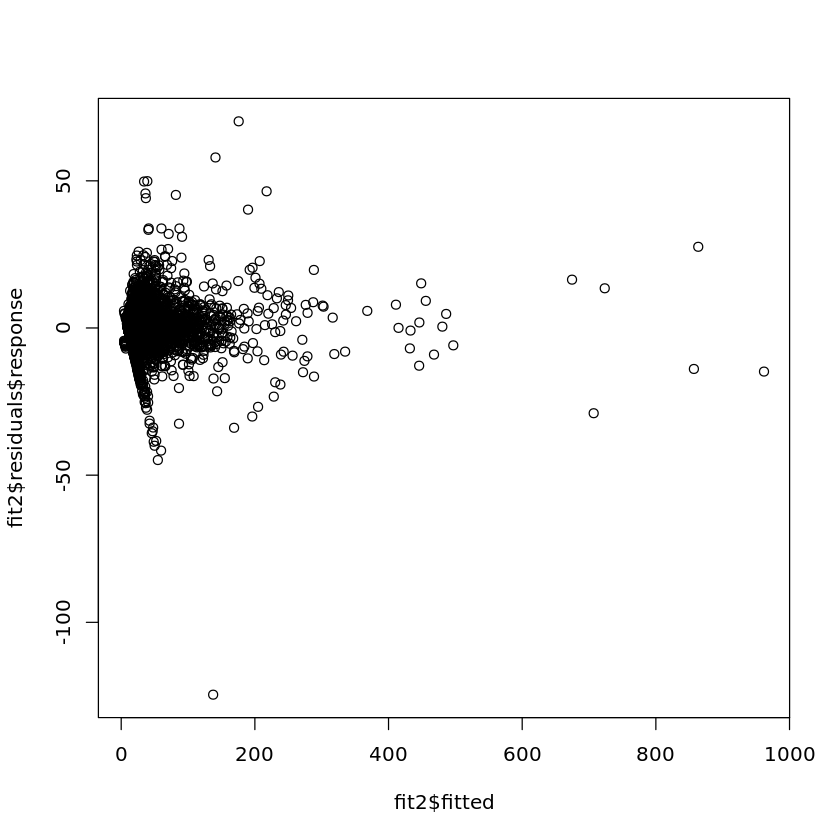

In [18]:
plot(fit2$fitted, fit2$residuals$response)

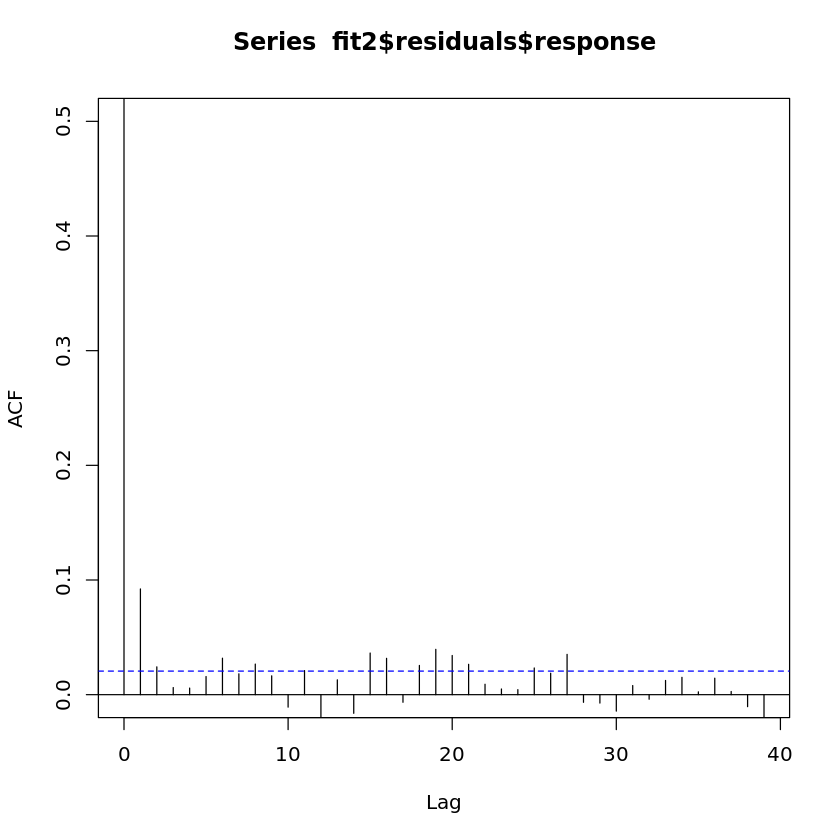

In [19]:
acf(fit2$residuals$response,ylim=c(0,0.5))

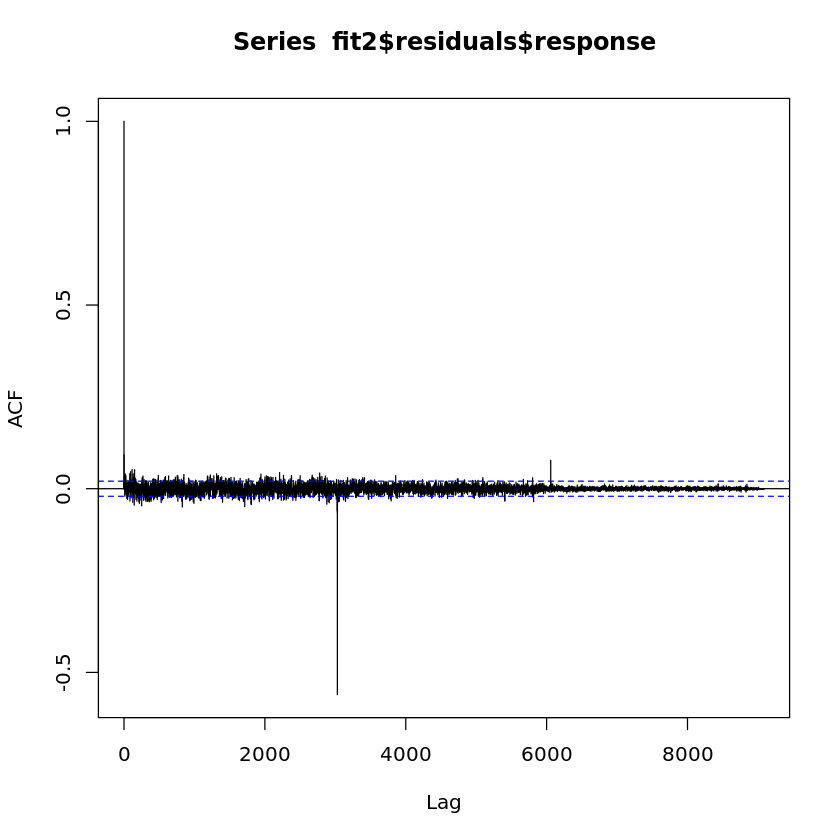

In [20]:
acf(fit2$residuals$response,"partial")
# correlation after AR1 is accounted for

# Coefficients
Order by effect size of the coefficient (note: coefficients have not been standardized)

In [21]:
fit2$summary %>%
    as_tibble(rownames=NA) %>%
    arrange(desc(abs(Mean)))

,Mean,2.5%,97.5%,n.sample,% accept,n.effective,Geweke.diag
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-8.0218,-9.2084,-6.9268,70000,42.7,132.0,-1.6
CCBP_RATE_CS_PER_1000,-5.2836,-9.8757,-1.2679,70000,42.7,91.4,4.7
ACS_PCT_PUBLIC_OTHER,4.1878,0.2545,8.0281,70000,42.7,416.3,2.2
CHR_MENTAL_DR_RATE,-3.7578,-5.4840,-2.1185,70000,42.7,194.7,-0.9
ACS_PCT_WHOLESALE,3.6404,2.0009,5.2771,70000,42.7,333.5,-10.9
ACS_PCT_AGE_0_17,3.5504,2.2293,4.8121,70000,42.7,87.3,0.7
ACS_PCT_PRIVATE_MDCR,-3.0985,-4.8007,-1.4168,70000,42.7,300.6,-1.9
ACS_PCT_NATURE,2.9406,1.6380,3.8369,70000,42.7,2.4,-2.1
ACS_PCT_COMMT_29MIN,-2.7725,-3.9695,-1.4932,70000,42.7,12.5,2.3


## Rates


In [23]:

demographic_info <- read_csv("data/raw/demo/2020-demographic-info.csv")
demographic_info <- demographic_info %>%
    mutate(FIPSCODE = paste0(STATE, COUNTY)) %>%
    select(FIPSCODE, CENSUS2010POP) %>%
    rename(pop=CENSUS2010POP) %>%
    mutate(pop=as.numeric(pop))

results_df <- results_df %>% 
    merge(demographic_info) %>%
    mutate(true_rate1000 = true_values / pop * 1000,
           fit_rate1000 = fitted_values / pop * 1000)


Rows: 3194 Columns: 180
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (6): SUMLEV, STATE, COUNTY, STNAME, CTYNAME, CENSUS2010POP
dbl (174): REGION, DIVISION, ESTIMATESBASE2010, POPESTIMATE2010, POPESTIMATE...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


[1] 13.22486

[1] 1.857384

# RMSE

In [26]:
caret::RMSE(fitted_values,true_values)
caret::RMSE(results_df$fit_rate1000,results_df$true_rate1000)

[1] 13.22486

[1] 1.857384

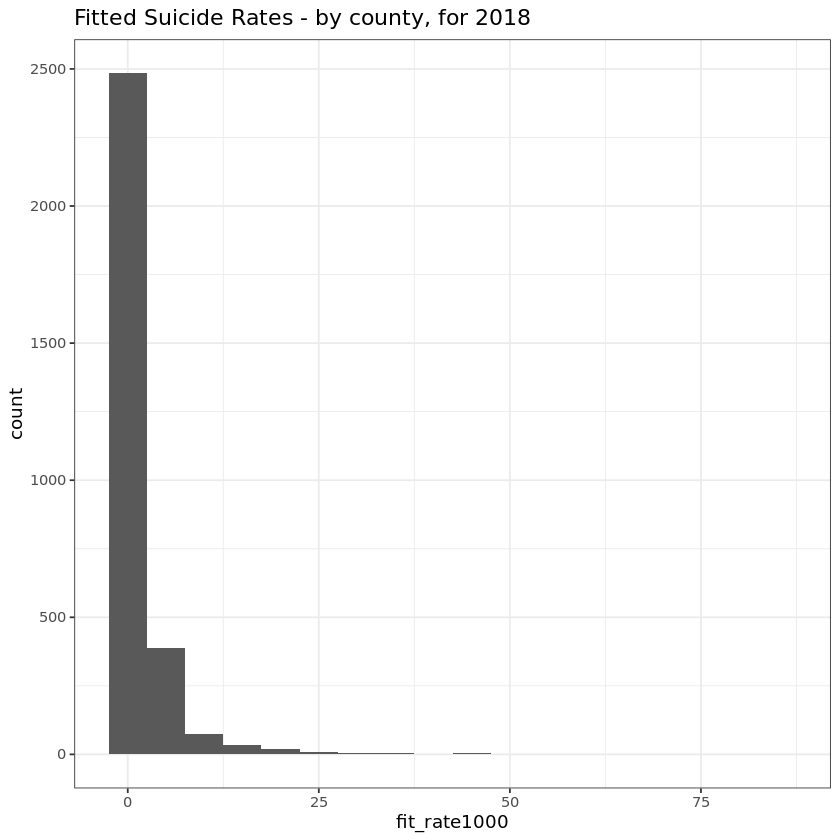

In [27]:
# histogram of fitted rate
# could be used to decide what constitues a high suicide rate
results_df %>% ggplot(aes(x=fit_rate1000)) + 
    geom_histogram(binwidth=5) +
    theme_bw() + 
    ggtitle("Fitted Suicide Rates - by county, for 2018")